In [1]:
import cv2, math, matplotlib.pyplot as plt, numpy as np
from IPython.display import Image 

# Proximity between cell labels
Cоседство между метками ячеек

In [2]:
mas = np.array([
    [1,2,3],
    [8,0,4],
    [7,6,5]
])


indices = [[i[0],j[0]] for i,j in [np.where(mas == k) for k in [k for k in range(1,9)]]]

indices

[[0, 0], [0, 1], [0, 2], [1, 2], [2, 2], [2, 1], [2, 0], [1, 0]]

In [3]:
class Proximity_between_cell_labels(object):
    def __init__(self,Name_of_classes,L):
        self.name = "_".join([str(n) for n in Name_of_classes])
        # An array that shows which elements are considered in a bundle
        # Масив, который показывает, какие элементы рассматриваются в связке
        self.classes = np.array(Name_of_classes)
        # Links between labels 
        # Связи между метками
        self.labels = {n:l for n,l in zip(Name_of_classes,L)}
        
class All_proximity_between_cell_labels(object): 
    def __init__(self,Mas_of_proximity_between_cell_labels):
        self.all_names = np.array([p.name for p in Mas_of_proximity_between_cell_labels])
        # All arrays that shows which elements are considered in a bundle
        # Все масивы, которые показывают, какие элементы рассматриваются в связке
        self.all_classes = np.array([p.classes for p in Mas_of_proximity_between_cell_labels])
        # All links between labels 
        # Все связи между метками
        self.all_proximity = np.array([p.labels for p in Mas_of_proximity_between_cell_labels])
        self.dict = {i:j for i,j in zip([tuple(p.classes) for p in Mas_of_proximity_between_cell_labels],self.all_proximity)}
        
        # L --- the position of the object we are considering
        # k1 --- label of the object we are considering
        # L --- neighbor's position
        
        # k1 --- мітка об'єкта, який розглядаємо
        # k2 --- мітка об'єкта, який є сусідом до попереднього
        # L --- позиція сусіда

    def the_existence_of_an_edge (self,k1,k2,L):
        i,j = L
        # We are looking for those arrays that have information about the presence of an edge or its absence
        # Ищем те массивы, которые имеют информацию о наличии ребра или его отсутствии

        # Location of mark k1
        # Местонахождение метки k1
        I, J = np.where (self.all_classes == k1)
    #     k1_i_j = [[i,j] for i,j in zip(I,J)]
        k1_i = [i for i,j in zip(I,J)]
        k1_j = [j for i,j in zip(I,J)]

        # The same
        # Аналогично
        I, J = np.where (self.all_classes == k2)
    #     k2_i_j = [[i,j] for i,j in zip(I,J)]
        k2_i = [i for i,j in zip(I,J)]
        k2_j = [j for i,j in zip(I,J)]

        # k1, k2 are together in a one-dimensional array
        # k1, k2 находятся вместе в одномерном масиве
        int1d = np.intersect1d(k1_i,k2_i)

        # Indices of such k1 and k2
        # Индексы таких  k1 и k2
        k1_2_i = [k1_i [i] for i in[np.where(k1_i == i)[0][0] for i in int1d]]
        k2_1_i =[k2_i [i] for i in[np.where(k2_i == i)[0][0] for i in int1d]]

        k1_2_j = [k1_j [i] for i in[np.where(k1_i == i)[0][0] for i in int1d]]
        k2_1_j =[k2_j [i] for i in[np.where(k2_i == i)[0][0] for i in int1d]]

        k1_indexes = np.stack((k1_2_i,k1_2_j)).T
        k2_indexes = np.stack((k2_1_i,k2_1_j)).T
        
#         print(np.array([ [a,b] for a,b in zip(k1_indexes,k2_indexes)]).T,np.array([ self.all_proximity[a[0]][k1][b[1]][i,j] for a,b in zip(k2_indexes,k1_indexes)]).T)

        # Data obtained from arrays that show the existence of an edge between labels
        # Данные полученые из масивов, которые показывают существование ребра между метками
        Ans_k_1_2 = np.array([ self.all_proximity[a[0]][k1][b[1]][i,j] for a,b in zip(k1_indexes,k2_indexes)]).T #all_proximity.all_proximity[k1[0]][k1][k2[1]]
        Ans_k_2_1 = np.array([ self.all_proximity[a[0]][k2][b[1]][1-(i-1),1-(j-1)] for a,b in zip(k2_indexes,k1_indexes)]).T
        # Check if an error exists. If yes, then show where the discrepancy is
        # Проверить, существует ли ошибка. Если да, то показываем где несоответствие.
        (Ans_k_1_2,Ans_k_2_1)
        
        check = np.vstack((Ans_k_1_2,Ans_k_2_1))
        if not(check.all() or (check == np.zeros(check.shape)).all()):
            mistake1 = np.array([ self.all_proximity[a[0]][k1][b[1]] for a,b in zip(k1_indexes,k2_indexes)])
            mistake2 = np.array([ self.all_proximity[a[0]][k2][b[1]] for a,b in zip(k2_indexes,k1_indexes)])

    #         f1 = np.array([ self.all_proximity[a[0]] for a,b in zip(k1_indexes,k2_indexes)])
    #         f2 = np.array([ self.all_proximity[a[0]] for a,b in zip(k2_indexes,k1_indexes)])

            print(f"All proximity \n {self.all_classes} \n")
            print(f"Difference in:")
            print(Ans_k_1_2,Ans_k_2_1 )
            print(f"\n Mistake in \n\nk1 = {k1} in k1_indexes = \n{k1_indexes}\n\ni = {i}, j = {j}\n\n{mistake1}\n\n")#{f1}")
            print(f"\n\nk2 = {k2} in k2_indexes = \n{k2_indexes}\n\ni = {1-(i-1)}, j = {1-(j-1)}\n\n{mistake2}\n\n")# from {f2}")
        return Ans_k_1_2[0]
        
    

                

In [4]:
m = np.array([[0],[0]])
n = np.array([[0]])
(m == np.zeros(m.shape)).all()

check = np.vstack((n,m))
check.all() or (check == np.zeros(check.shape)).all()

# ((Ans_k_1_2 == np.zeros(Ans_k_1_2.shape)).all() or (Ans_k_2_1 == np.zeros(Ans_k_2_1.shape)).all())

True

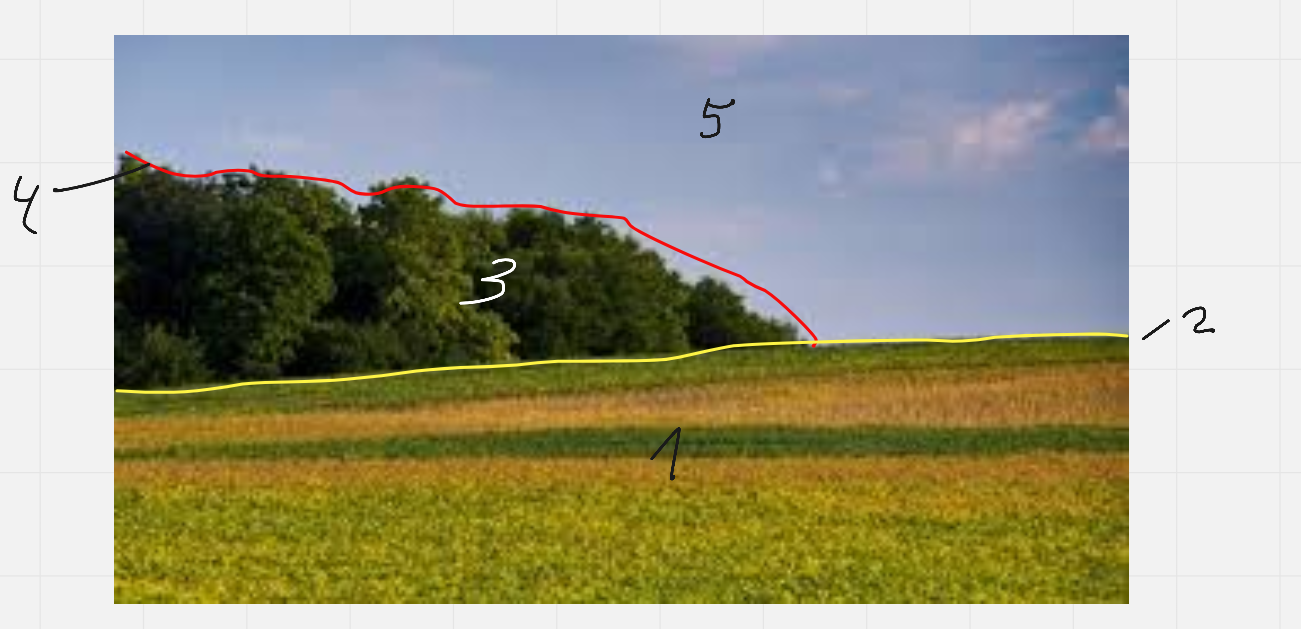

In [5]:
Image(r'.\Segments and boundaries\task.png') 

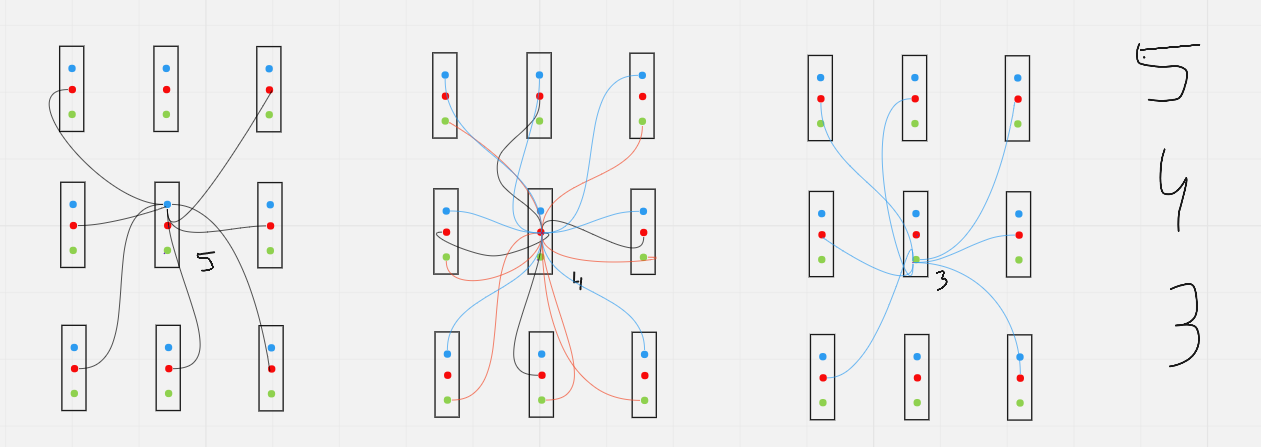

In [6]:
Image(r'.\Segments and boundaries\5_4_3.png') 

In [7]:
L_1_1 = np.array([
    [True,True,True],
    [True,2,True],
    [True,True,True]
])

L_1_2 = np.array([
    [True,False,True],
    [True,2,True],
    [True,True,True]
])

L_1_3 = np.array([
    [False,False,False],
    [False,2,False],
    [False,False,False]
])

L_1 = np.stack((L_1_1,L_1_2,L_1_3))

L_2_1 = np.array([
    [True,True,True],
    [True,2,True],
    [True,False,True]
])

L_2_2 = np.array([
    [False,True,False],
    [True,2,True],
    [False,True,False]
])

L_2_3 = np.array([
    [True,False,True],
    [True,2,True],
    [True,True,True]
])

L_2 = np.stack((L_2_1,L_2_2,L_2_3))

L_3_1 = np.array([
    [False,False,False],
    [False,2,False],
    [False,False,False]
])

L_3_2 = np.array([
    [True,True,True],
    [True,2,True],
    [True,False,True]
])


L_3_3 = np.array([
    [True,True,True],
    [True,2,True],
    [True,True,True]
])

L_3 = np.stack((L_3_1,L_3_2,L_3_3))    

In [8]:
Proximity_5_4_3 = Proximity_between_cell_labels([5,4,3],[L_1,L_2,L_3])

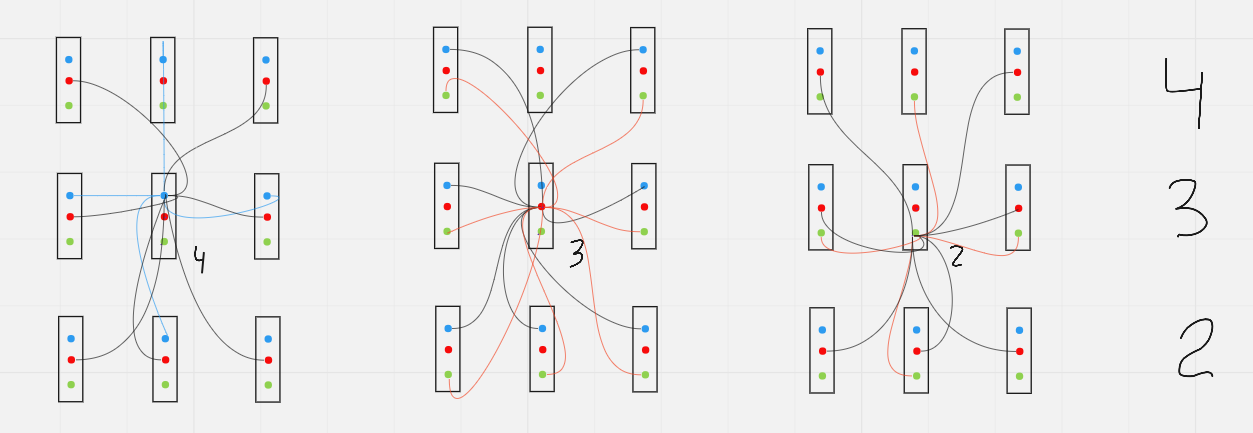

In [9]:
Image(r'.\Segments and boundaries\4_3_2.png')

In [10]:
L_1_1 = np.array([
    [False,True,False],
    [True,2,True],
    [False,True,False]
])

L_1_2 = np.array([
    [True,False,True],
    [True,2,True],
    [True,True,True]
])

L_1_3 = np.array([
    [False,False,False],
    [False,2,False],
    [False,False,False]
])

L_1 = np.stack((L_1_1,L_1_2,L_1_3))

L_2_1 = np.array([
    [True,True,True],
    [True,2,True],
    [True,False,True]
])

L_2_2 = np.array([
    [True,True,True],
    [True,2,True],
    [True,True,True]
])

L_2_3 = np.array([
    [True,False,True],
    [True,2,True],
    [True,True,True]
])

L_2 = np.stack((L_2_1,L_2_2,L_2_3))

L_3_1 = np.array([
    [False,False,False],
    [False,2,False],
    [False,False,False]
])

L_3_2 = np.array([
    [True,True,True],
    [True,2,True],
    [True,False,True]
])

L_3_3 = np.array([
    [False,True,False],
    [True,2,True],
    [False,True,False]
])


L_3 = np.stack((L_3_1,L_3_2,L_3_3))


In [11]:
Proximity_4_3_2 = Proximity_between_cell_labels([4,3,2],[L_1,L_2,L_3])

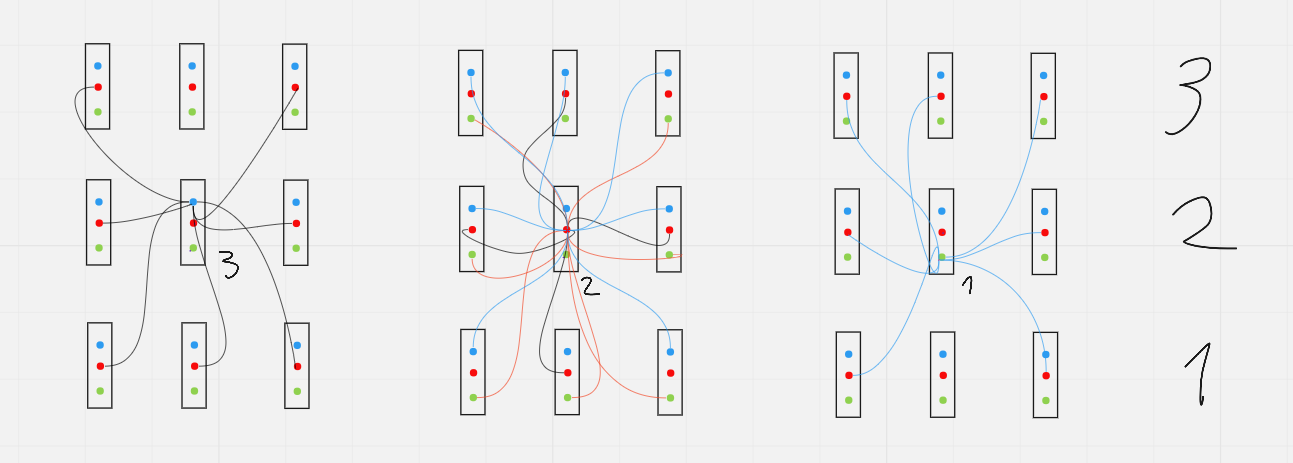

In [12]:
Image(r'.\Segments and boundaries\3_2_1.png')

In [13]:
L_1_1 = np.array([
    [True,True,True],
    [True,2,True],
    [True,True,True]
])

L_1_2 = np.array([
    [True,False,True],
    [True,2,True],
    [True,True,True]
])

L_1_3 = np.array([
    [False,False,False],
    [False,2,False],
    [False,False,False]
])

# L_1_1 = np.array([
#     [False,False,False],
#     [False,2,False],
#     [False,False,False]
# ])

# L_1_2 = np.array([
#     [True,False,True],
#     [True,2,True],
#     [True,True,True]
# ])

# L_1_3 = np.array([
#     [False,False,False],
#     [False,2,False],
#     [False,False,False]
# ])

L_1 = np.stack((L_1_1,L_1_2,L_1_3))

L_2_1 = np.array([
    [True,True,True],
    [True,2,True],
    [True,False,True]
])

L_2_2 = np.array([
    [False,True,False],
    [True,2,True],
    [False,True,False]
])

L_2_3 = np.array([
    [True,False,True],
    [True,2,True],
    [True,True,True]
])

L_2 = np.stack((L_2_1,L_2_2,L_2_3))

L_3_1 = np.array([
    [False,False,False],
    [False,2,False],
    [False,False,False]
])

L_3_2 = np.array([
    [True,True,True],
    [True,2,True],
    [True,False,True]
])

L_3_3 = np.array([
    [True,True,True],
    [True,2,True],
    [True,True,True]
])


# L_3_3 = np.array([
#     [False,False,False],
#     [False,2,False],
#     [False,False,False]
# ])



L_3 = np.stack((L_3_1,L_3_2,L_3_3))

In [14]:
Proximity_3_2_1 = Proximity_between_cell_labels([3,2,1],[L_1,L_2,L_3])

# 5_2_1

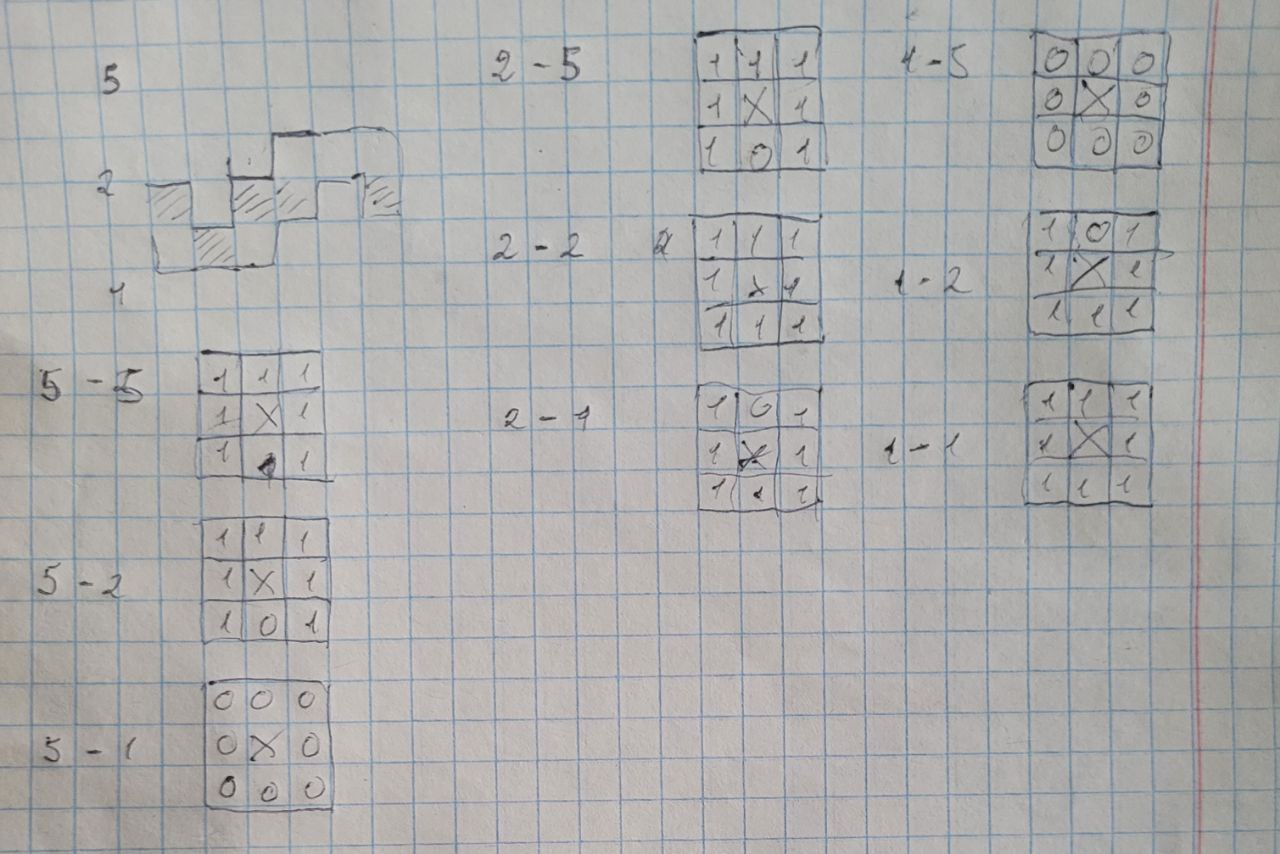

In [15]:
Image(r'.\Segments and boundaries\5_2_1.jpg') 

In [16]:
L_1_1 = np.array([
    [True,True,True],
    [True,2,True],
    [True,True,True]
])


L_1_2 = np.array([
    [True,False,True],
    [True,2,True],
    [True,True,True]
])


L_1_3 = np.array([
    [False,False,False],
    [False,2,False],
    [False,False,False]
])

L_1 = np.stack((L_1_1,L_1_2,L_1_3))

L_2_1 = np.array([
    [True,True,True],
    [True,2,True],
    [True,False,True]
])

L_2_2 = np.array([
    [False,True,False],
    [True,2,True],
    [False,True,False]
])

L_2_3 = np.array([
    [True,False,True],
    [True,2,True],
    [True,True,True]
])

L_2 = np.stack((L_2_1,L_2_2,L_2_3))

L_3_1 = np.array([
    [False,False,False],
    [False,2,False],
    [False,False,False]
])

L_3_2 = np.array([
    [True,True,True],
    [True,2,True],
    [True,False,True]
])

L_3_3 = np.array([
    [True,True,True],
    [True,2,True],
    [True,True,True]
])



L_4 = np.stack((L_3_1,L_3_2,L_3_3))



In [17]:
Proximity_5_2_1 = Proximity_between_cell_labels([5,2,1],[L_1,L_2,L_3])

In [18]:
Proximity_5_4_3.name

'5_4_3'

In [19]:
Proximity_5_4_3.classes

array([5, 4, 3])

In [20]:
Proximity_5_4_3.labels

{5: array([[[1, 1, 1],
         [1, 2, 1],
         [1, 1, 1]],
 
        [[1, 0, 1],
         [1, 2, 1],
         [1, 1, 1]],
 
        [[0, 0, 0],
         [0, 2, 0],
         [0, 0, 0]]]),
 4: array([[[1, 1, 1],
         [1, 2, 1],
         [1, 0, 1]],
 
        [[0, 1, 0],
         [1, 2, 1],
         [0, 1, 0]],
 
        [[1, 0, 1],
         [1, 2, 1],
         [1, 1, 1]]]),
 3: array([[[0, 0, 0],
         [0, 2, 0],
         [0, 0, 0]],
 
        [[1, 1, 1],
         [1, 2, 1],
         [1, 0, 1]],
 
        [[1, 1, 1],
         [1, 2, 1],
         [1, 1, 1]]])}

In [21]:
all_proximity = All_proximity_between_cell_labels([Proximity_5_4_3,Proximity_4_3_2,Proximity_3_2_1,Proximity_5_2_1 ])

In [22]:
all_proximity.all_names 

array(['5_4_3', '4_3_2', '3_2_1', '5_2_1'], dtype='<U5')

In [23]:
all_proximity.all_classes

array([[5, 4, 3],
       [4, 3, 2],
       [3, 2, 1],
       [5, 2, 1]])

In [24]:
k1 = 2; k2 = 3
i = 1; j = 0
L = (i,j)

all_proximity.all_proximity[1][2][1][2][0]

1

In [25]:
all_proximity.the_existence_of_an_edge (k1,k2,L)

1

In [26]:
all_proximity.the_existence_of_an_edge (1,3,L)

0

# Image and its data
Изображение и его данные

In [27]:
class Image_class(object):
    def __init__(self, path):
        self.img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
        print('Original Dimensions : ',self.img.shape)
        self.max_i, self.max_j, _ = self.img.shape
        #self.resize()
    # Resize image size
    # Изменить размер изображения
    def resize(self):
        width = 5
        height = 5
        dim = (height,width)
        
        self.max_i = height
        self.max_j = width

        # resize image
        self.reimg = cv2.resize(self.img, dim, interpolation = cv2.INTER_AREA)
        print('Resized Dimensions : ', self.reimg.shape)
        

In [28]:
i = 4
# path = f"./img/img{i}/img{i}.jpg"
# img = Image(path)
# Image(r"./img/img"+str(i)+"/img"+str(i)+".jpg") 
for j in [5,3,1]:
    print (f"./img/img{i}/classes/{j}.jpg")
    Image_class(f"./img/img{i}/classes/{j}.jpg") 

./img/img4/classes/5.jpg
Original Dimensions :  (187, 638, 3)
./img/img4/classes/3.jpg
Original Dimensions :  (45, 252, 3)
./img/img4/classes/1.jpg
Original Dimensions :  (188, 638, 3)


In [29]:
image = Image_class(f"./img/img{4}/img{4}.jpg") 

Original Dimensions :  (480, 640, 3)


In [30]:
all_proximity.the_existence_of_an_edge (2,3,L)

1

In [31]:
image.resize()

Resized Dimensions :  (5, 5, 3)


# Normal distribution for part of the image
Нормальное распределение для части изображения



In [32]:
class Normal_distribution (object):   
    # Obtaining the covariance matrix and mathematical expectation
    # Получение матрицы ковариации и математического ожидания
    def __init__(self, image):
        self.data = self.M_σ(image.img)
    def M_σ(self,image):
        mas = np.array(image[0])
        for i in range(1,len(image)):
            np.vstack((mas,image[i]))
        image_n = mas
        mean = np.mean(image_n,axis=0); sigma=np.var(image_n,axis=0); cov = np.cov(mas,rowvar=False)
        print('DATA','\n','M = ',mean,'\n','σ = ',sigma,'\n', 'cov = ','\n',cov)
        return [mean,cov]

In [33]:
normal_distribution = Normal_distribution(image)

DATA 
 M =  [119.2609375  87.8359375  59.903125 ] 
 σ =  [ 531.45847412 1728.346521   2407.72186523] 
 cov =  
 [[ 532.29017752  956.06948112 1122.18337735]
 [ 956.06948112 1731.05128863 2037.4520002 ]
 [1122.18337735 2037.4520002  2411.48981808]]


In [57]:
class All_distributions (object):   
    # Obtaining the covariance matrix and mathematical expectation
    # Получение матрицы ковариации и математического ожидания
    def __init__(self):
        self.data = {}
        for i in [5,3,1]:
            path = f"./img/img4/Classes/{i}.jpg"
            print(f"Data for image {path}")
            Image(path)
            self.data[str(i)] = Normal_distribution(Image_class(path)).data

In [62]:
for i in [5,3,1]:
    Image(f"./img/img4/Classes/{i}.jpg")

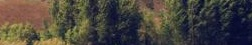

In [63]:
Image(f"./img/img4/Classes/5.jpg")
Image(f"./img/img4/Classes/3.jpg")

In [59]:
distributions = All_distributions()
distributions.data

Data for image ./img/img4/Classes/5.jpg
Original Dimensions :  (187, 638, 3)
DATA 
 M =  [119.10501567  87.34952978  59.2476489 ] 
 σ =  [ 502.09712218 1622.97657501 2246.53428131] 
 cov =  
 [[ 502.88534372  900.71676845 1056.86249219]
 [ 900.71676845 1625.52441893 1908.60561114]
 [1056.86249219 1908.60561114 2250.06102272]]
Data for image ./img/img4/Classes/3.jpg
Original Dimensions :  (45, 252, 3)
DATA 
 M =  [69.46031746 85.75       93.51984127] 
 σ =  [ 407.89921895  973.23511905 1815.78135236] 
 cov =  
 [[ 409.52431544  556.57768924  737.29361917]
 [ 556.57768924  977.1125498  1252.36155378]
 [ 737.29361917 1252.36155378 1823.01554101]]
Data for image ./img/img4/Classes/1.jpg
Original Dimensions :  (188, 638, 3)
DATA 
 M =  [ 86.1630094  166.46081505 238.71316614] 
 σ =  [223.92640599 605.01962441 304.19202101] 
 cov =  
 [[224.27793881 322.52916049 223.80821149]
 [322.52916049 605.96941974 375.54839742]
 [223.80821149 375.54839742 304.6695595 ]]


{'5': [array([119.10501567,  87.34952978,  59.2476489 ]),
  array([[ 502.88534372,  900.71676845, 1056.86249219],
         [ 900.71676845, 1625.52441893, 1908.60561114],
         [1056.86249219, 1908.60561114, 2250.06102272]])],
 '3': [array([69.46031746, 85.75      , 93.51984127]),
  array([[ 409.52431544,  556.57768924,  737.29361917],
         [ 556.57768924,  977.1125498 , 1252.36155378],
         [ 737.29361917, 1252.36155378, 1823.01554101]])],
 '1': [array([ 86.1630094 , 166.46081505, 238.71316614]),
  array([[224.27793881, 322.52916049, 223.80821149],
         [322.52916049, 605.96941974, 375.54839742],
         [223.80821149, 375.54839742, 304.6695595 ]])]}

# Cell and its neighbors
Ячейка и ее соседи

In [36]:
class Сell(object):
    # Cell data
    # Данные ячейки
    def __init__(self,image, all_proximity, i, j):
        self.image = image 
        self.i = i
        self.j = j
        self.find_neighbours(i,j)
        self.k = [1,2,3,4,5]
#         self.neighbours
#         self.distance
        self.find_neighbours(i,j)
        self.proximities_with_neighbours = {f"{L}":{k1: {k2 : z for k2 in self.k if ([k1,k2]!=[1,4]) and ([k1,k2]!=[4,1]) and (z:=all_proximity.the_existence_of_an_edge(k1,k2,L)) == 1} for k1 in self.k} for L in self.distance }
        

    
        
    # Find neighbors of a cell in an image  
    # Найти соседей яейки изображения
    def find_neighbours(self,i,j):
        self.neighbours = np.array([[0,0]])
        n = np.array([
            [(-1,-1),(0,-1),(1,-1)],
            [(-1,0),(2,2),(1,0)],
            [(-1,1),(0,1),(1,1)]
        ])
        for c in n:
            for v in c:
                a,b = v
                if a == 2 and b == 2:continue
                if (0 <= i+a and i+a <= self.image.max_i) and (0 <= j+b and j+b <= self.image.max_j):
                    self.neighbours = np.vstack((self.neighbours,[i+a,j+b]))
        self.neighbours = np.delete(self.neighbours,0, axis = 0) 
        self.distance = [[1+self.i-a,1+self.j-b] for a,b in self.neighbours] 
        
    def delete_k1_k2_for_i_j(self,k1,k2,n):
        if k1 in self.proximities_with_neighbours[n]:
            if k2 in self.proximities_with_neighbours[n][k1]:
                del self.proximities_with_neighbours[n][k1][k2]
                if len(self.proximities_with_neighbours[n][k1].keys()) == 0: del self.proximities_with_neighbours[n][k1]
        if len(self.proximities_with_neighbours[n].keys()) == 0: print("ERROR --- 0 proximities_with_neighbours with", n); return
        
    
    #def find_connections ():
        #{f"[{self.i},{self.j}]({k1})-[{i},{j}]({k2})":c for i,j in self.neighbours for  }
        #for k1 in self.k:
            #for k2 in self.k:
#         for L in self.neighbours:
#             self.image.all_proximity()
        
        
#     def __del__(self):
#         del self.image
#         del self.i
#         del self.j
#         del self.neighbours
        
t = 3                    
A = Сell(image,all_proximity,t,t)
A.neighbours  

array([[2, 2],
       [3, 2],
       [4, 2],
       [2, 3],
       [4, 3],
       [2, 4],
       [3, 4],
       [4, 4]])

In [37]:
Proximity_3_2_1.labels

{3: array([[[1, 1, 1],
         [1, 2, 1],
         [1, 1, 1]],
 
        [[1, 0, 1],
         [1, 2, 1],
         [1, 1, 1]],
 
        [[0, 0, 0],
         [0, 2, 0],
         [0, 0, 0]]]),
 2: array([[[1, 1, 1],
         [1, 2, 1],
         [1, 0, 1]],
 
        [[0, 1, 0],
         [1, 2, 1],
         [0, 1, 0]],
 
        [[1, 0, 1],
         [1, 2, 1],
         [1, 1, 1]]]),
 1: array([[[0, 0, 0],
         [0, 2, 0],
         [0, 0, 0]],
 
        [[1, 1, 1],
         [1, 2, 1],
         [1, 0, 1]],
 
        [[1, 1, 1],
         [1, 2, 1],
         [1, 1, 1]]])}

In [38]:
cell = Сell(image,all_proximity,t,t)
cell.neighbours 

array([[2, 2],
       [3, 2],
       [4, 2],
       [2, 3],
       [4, 3],
       [2, 4],
       [3, 4],
       [4, 4]])

In [39]:
len(cell.proximities_with_neighbours.keys())

8

In [40]:
neighbour = '[2, 2]'
cell.proximities_with_neighbours[neighbour][1][2]

1

In [41]:
cell.proximities_with_neighbours[neighbour]

{1: {1: 1, 2: 1},
 2: {1: 1, 3: 1, 5: 1},
 3: {2: 1, 3: 1, 4: 1},
 4: {3: 1, 5: 1},
 5: {2: 1, 4: 1, 5: 1}}

In [42]:
cell.delete_k1_k2_for_i_j(1,1,'[2, 2]')
cell.proximities_with_neighbours[neighbour]

{1: {2: 1},
 2: {1: 1, 3: 1, 5: 1},
 3: {2: 1, 3: 1, 4: 1},
 4: {3: 1, 5: 1},
 5: {2: 1, 4: 1, 5: 1}}

# An array of cells that contains neighborhood information, color and distribution information.
Масив комірок, які містять інформацію про сусідство та інформацію про колір та розподіл.

In [43]:
class All_cells_of_img(object):
    def __init__(self,image,all_proximity):
        self.cells = np.array([[Сell(image,all_proximity,i,j) for j in range(image.max_j) ] for i in range(image.max_i)])
        
        

In [44]:
image.max_i

5

In [45]:
G = All_cells_of_img(image,all_proximity)
G.cells

array([[<__main__.Сell object at 0x000001B40E9184C0>,
        <__main__.Сell object at 0x000001B40E913CD0>]], dtype=object)

In [46]:
G.cells[0][0]

In [47]:
g = G.cells[0][0].proximities_with_neighbours
c = np.array([k for k in g.keys()]) 
g[c[0]]

{1: {1: 1, 2: 1},
 2: {2: 1, 3: 1, 5: 1},
 3: {3: 1, 4: 1},
 4: {4: 1, 5: 1},
 5: {5: 1}}

# Some tests and usefull info
Немного тестов и полезной информации


In [48]:
a = [1,2,3]
b = [1,2,3]
k = [1,2,3,4,5]
#[[i,j] for i in a for j in b if [i,j] != [1,1] and [i,j] != [3,2] ]
{c:{i:{j: i+j+c for j in b if [i,j] != [1,1] and [i,j] != [3,2]} for i in a } for c in k }

{1: {1: {2: 4, 3: 5}, 2: {1: 4, 2: 5, 3: 6}, 3: {1: 5, 3: 7}},
 2: {1: {2: 5, 3: 6}, 2: {1: 5, 2: 6, 3: 7}, 3: {1: 6, 3: 8}},
 3: {1: {2: 6, 3: 7}, 2: {1: 6, 2: 7, 3: 8}, 3: {1: 7, 3: 9}},
 4: {1: {2: 7, 3: 8}, 2: {1: 7, 2: 8, 3: 9}, 3: {1: 8, 3: 10}},
 5: {1: {2: 8, 3: 9}, 2: {1: 8, 2: 9, 3: 10}, 3: {1: 9, 3: 11}}}

In [49]:
# class Foo(Bar):
#     def baz(self, arg):
#         return super().baz(arg)


# class A(object):     # deriving from 'object' declares A as a 'new-style-class'
#     def foo(self):
#         print "foo"

# class B(A):
#     def foo(self):
#         super(B, self).foo()   # calls 'A.foo()'

# myB = B()
# myB.foo()

class A():
  def bar(self, string):
    print("Hi, I'm bar, inherited from A"+string)

class B(A):
  def baz(self):
    self.bar(" - called by baz in B")

B().baz() # prints out "Hi, I'm bar, inherited from A - called by baz in B"

#https://younglinux.info/oopython/objects
class B:
    n = 5
    def adder(self, v):
        return v + self.n
 
w = B()
w.__dict__
w.n = 8
w.__dict__

w.__dict__['m'] = 100
w.__dict__
w.m
w.__dict__

Hi, I'm bar, inherited from A - called by baz in B


{'n': 8, 'm': 100}

In [50]:
class Salary(object):
    def __init__(self, pay):
        self.pay = pay

    def getTotal(self):
        return (self.pay * 12)

class Employee(object):
    def __init__(self, pay, bonus):
        self.pay = pay
        self.bonus = bonus

    def annualSalary(self):
        return "Total: " + str(self.pay.getTotal() + self.bonus)

salary = Salary(100)
employee = Employee(salary, 10)
print(employee.annualSalary())

Total: 1210


In [51]:
mas_1 = np.array([
    [0,0,0],
    [0,1,0],
    [0,0,0]
])
mas_2 = np.array([
    [0,0,0],
    [0,1,0],
    [0,0,0]
])

In [52]:
i,j = [(0,1),(2,0)][0]

In [53]:
neighbours = np.array([
    [(-1,-1),(0,-1),(1,-1)],
    [(-1,0),(2,2),(1,0)],
    [(-1,1),(0,1),(1,1)]
])
neighbours.shape

(3, 3, 2)

In [54]:
for i in neighbours:
    for j in i:
        a,b = j
        if a == 2 and b == 2:continue
        print(a,b)

-1 -1
0 -1
1 -1
-1 0
1 0
-1 1
0 1
1 1
